<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Pr%C3%A1ctica%204%3A%20algoritmo%20de%20Simon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PON TU NOMBRE AQUÍ**

---

# Práctica 4: algoritmo de Simon

Implementa en Qiskit el algoritmo de Simon para un $n$ y un $c$ arbitrario y el oráculo simple que hemos visto.

Empieza implementando el oráculo como una puerta.

Para probarlo, supón $n=3$ y $c$ un valor aleatorio en el intervalo $[0,7]$. Obtén el valor de $c$ a partir de la salida del algoritmo.

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [2]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

In [94]:
def get_s(n):
    s = list()
    for q in range(n):
        if np.random.randint(2) == 1:
            s.append(1)
        else:
            s.append(0)
    if all( e == 0 for e in s ):
        s[0] = 1
    return(s)

# Ejemplo de oráculo para n=3 y c=110
# init es el valor inicial del registro x
def simon_oraculo(init, n, s):
    x = QuantumRegister(n, name="|x\\rangle")
    ancilla = QuantumRegister(n, name="|ancilla\\rangle")
    meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x, ancilla, meas)
    qc.initialize(init)
    # Hacemos la copia de la x a las ancillas
    qc.cx(x,ancilla)

    qc.barrier()

    sinv = s[::-1] # Invertimos s para recorrerlo del bit menos al más significativo

    for p in range(n):
      if sinv[p] == 1:
        qc.cx(x[p],ancilla[p])

    qc.barrier()
    qc.measure(ancilla, meas)
    qc.barrier()
    return(qc)


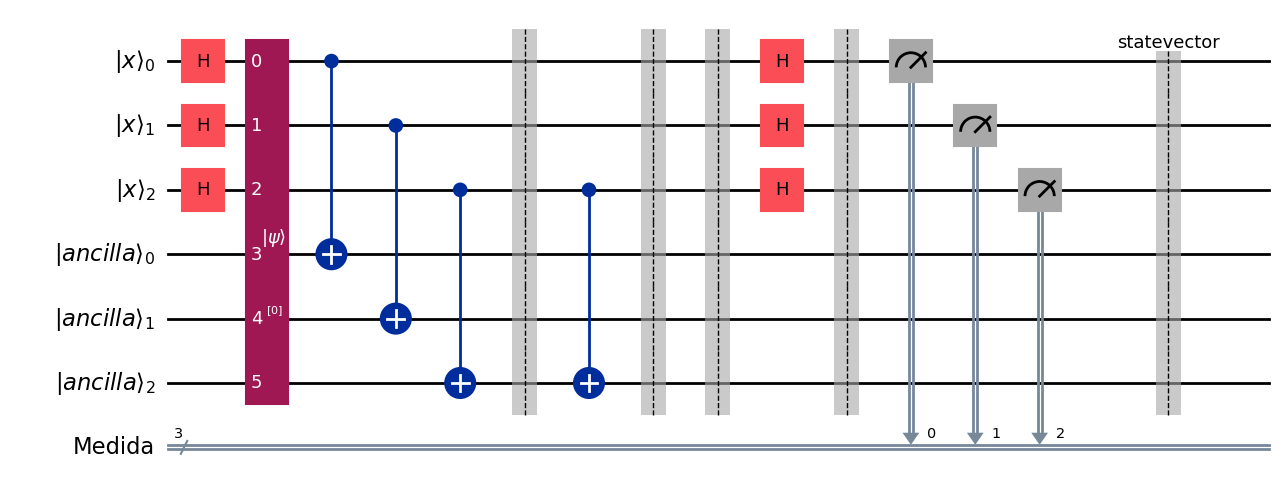

In [89]:
def algoritmo_Simon(init, n, s):
    x = QuantumRegister(n, name="|x\\rangle")
    ancilla = QuantumRegister(n, name="|ancilla\\rangle")
    meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x, ancilla, meas)

    qc.h(range(n))

    qc = qc.compose(simon_oraculo(init, n, s))


    qc.h(range(n))
    qc.barrier()
    qc.measure(x, meas)

    return qc

n = 3
s = get_s(n)
qc = algoritmo_Simon(0, n, s)
qc.save_statevector()
qc.draw('mpl')


In [35]:
obten_estado(qc, etiqueta="|\psi\!\!> = ", bloch=False)

<IPython.core.display.Latex object>

In [90]:
def solve_for_solution(counts):

#   extraemos la longitud de las cuentas 'x' que será igual a la de la incógnita 's'
    n = len(list(counts)[0])

#   generamos todos los posibles inputs
    s_list = [format(i, 'b').zfill(n) for i in range(1, 2**n)]
#    s_list = [format(i, '0'+str(n)+'b') for i in range(1, 2**n)]  # otra manera de hacer lo mismo
#   ahora evaluamos, para cada s,  s.x_i = 0 con todos los x_i encontrados
    for s_str in s_list:
        s = [int(_) for _ in list(s_str)]

#   sólo necesitamos n valores de x independientes'
        prod_sxi = [sum([s[j]*int(xi[j]) for j in range(len(s))])%2 for xi in list(counts)[:n]]
#   sólo si todos los s.x_i = 0 también la suma será = 0
        sum_sx = sum(prod_sxi)
        print('(Sum_{i=1}^4 s.x_i%2))=', sum_sx, ' para s=', s_str)
        if  sum_sx==0:
            return s_str
            break

The secret value is :  [0, 1, 1]


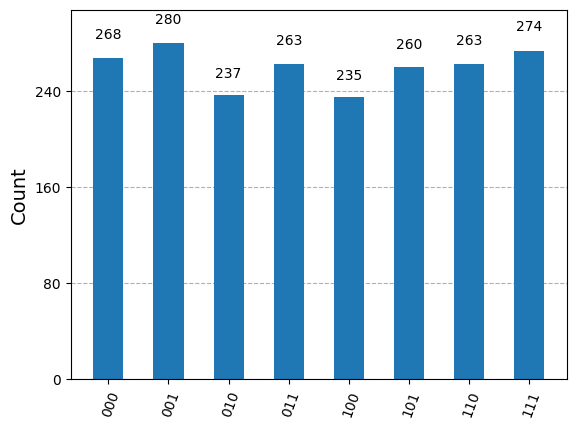

In [95]:
# Probamos para diferentes valores
from qiskit.result import Counts
n = 3
sim = AerSimulator(method='automatic')
s = get_s(n)
print("The secret value is : " , str(s))
x_to_salida_map = {}
salida2 = []
#for x in range(8):
#  qc = algoritmo_Simon(x, n, s)

  # Ejecutamos una simulación y obtenemos los resultados
#  qc_obj = transpile(qc, sim)
#  salida = sim.run(qc_obj, shots=1).result().get_counts()
#  print(salida)
  #print('f({0:03b}) = {1}'.format(x,list(salida.keys())[0]))
#  for key in salida.keys():
#    x_to_salida_map[x] = key


#print(x_to_salida_map)
#plot_histogram(x_to_salida_map)


qc = algoritmo_Simon(0, n, s)
sim = AerSimulator(method='automatic')
qc_obj = transpile(qc, sim)
result = sim.run(qc_obj, shots = 2080).result()
salida = result.get_counts()
plot_histogram(salida)



# Si resolvemos el sistema de ecuaciones manualmente vemos que en todos los casos se recuperar c

In [96]:
salida2 = np.array(list(salida.keys()))
array_listas = [[int(bit) for bit in string] for string in salida2]
print(array_listas)

[[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1]]


In [92]:
import numpy as np
from sympy import Matrix

def solve_simon_equations(equations, n):
    """
    Resuelve el sistema de ecuaciones lineales mod 2 generado en el algoritmo de Simon.

    Args:
        equations (list of list of int): Lista de vectores `y` obtenidos de las mediciones.
        n (int): Número de qubits de entrada.

    Returns:
        list: El vector `s` que satisface las ecuaciones mod 2.
    """
    # Convertir las ecuaciones en una matriz binaria
    A = np.array(equations, dtype=int)

    # Convertir la matriz a forma escalonada reducida mod 2 usando SymPy
    M = Matrix(A).rref(iszerofunc=lambda x: x % 2 == 0)  # Forma escalonada reducida
    rref_matrix = np.array(M[0].tolist(), dtype=int) % 2

    # Extraer el núcleo de la matriz para encontrar soluciones
    null_space = Matrix(A).nullspace()
    if not null_space:
        raise ValueError("No se encontraron soluciones válidas.")

    # El núcleo es el vector solución `s` (puede haber múltiples soluciones)
    s = np.array(null_space[0].tolist(), dtype=int).flatten() % 2
    return s



--------------------
-------------------
------------------